### Importing the necessary modules

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import random

## Dataset to be analysed
### ADULT CENSUS


### Describing the data

In [101]:
adult = pd.read_csv("E://CDAV Feb 23//Datasets//adult.csv//adult.csv")
adult.head(11)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [102]:
adult.shape


(32561, 15)

In [103]:
adult.columns.to_list()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

In [104]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [105]:
adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Data Cleaning

In [106]:
adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [107]:
adult.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [108]:
adult[adult['workclass'] == '?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [109]:
adult[adult == '?'] = np.nan

In [110]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [111]:
adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [112]:
adult['workclass'].mode()[0]

'Private'

In [113]:
for i in ['workclass']:
    adult['workclass'].fillna(value=adult.workclass.mode()[0], inplace=True)


In [115]:
for i in ['occupation']:
    adult['occupation'].fillna(value=adult.occupation.mode()[0], inplace=True)

In [116]:
for i in ['native.country']:
    adult['native.country'].fillna(value = adult['native.country'].mode()[0], inplace=True)

In [117]:
adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Problem Questions
1.Does education level determine one's income in any way?

2.Does a gender pay gap exist?

3.How does marital state affect income?

### QUESTION 1

In [122]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [123]:
adult.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

<Axes: xlabel='income', ylabel='count'>

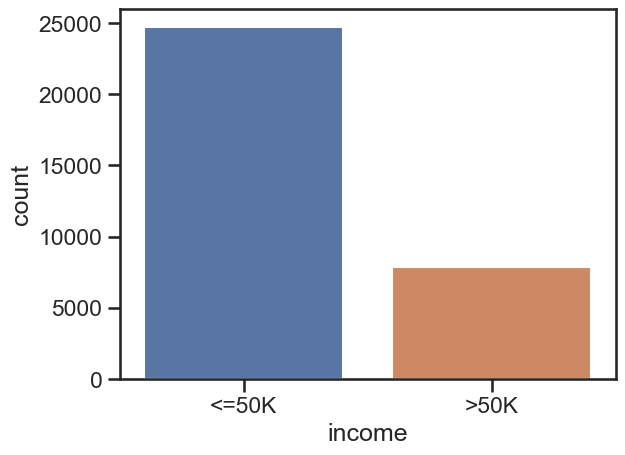

In [124]:
sns.countplot(data = adult, x = 'income')

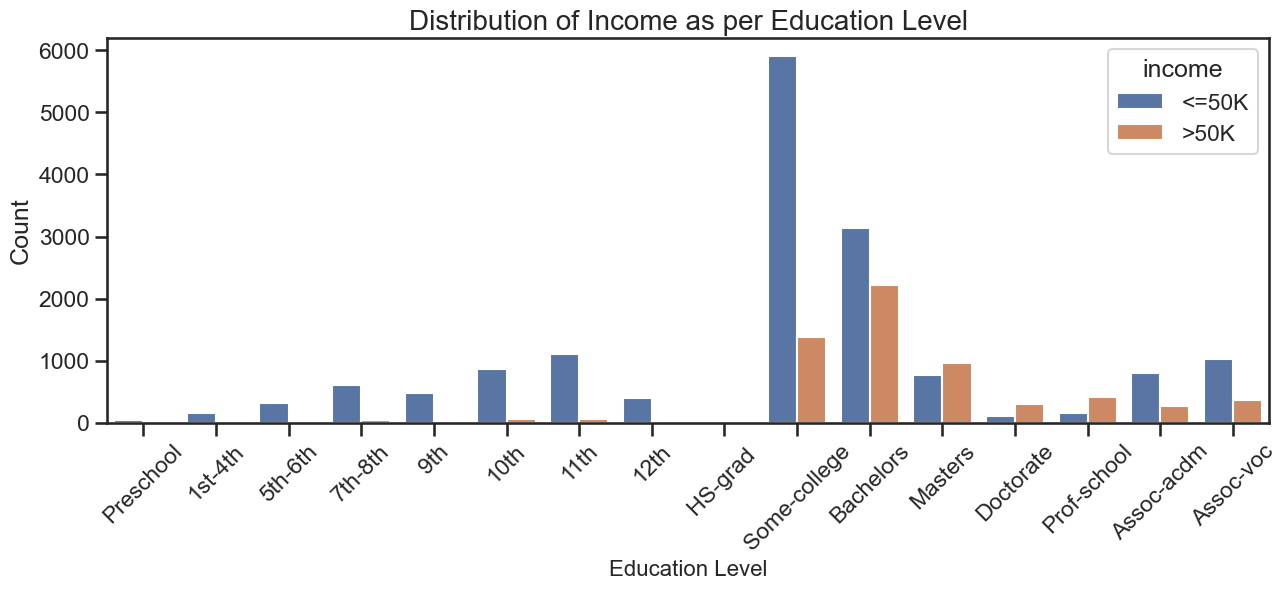

In [125]:
plt.figure(figsize=(15,5))
sns.countplot(data = adult, x = 'education' , hue = 'income',order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 'Assoc-acdm', 'Assoc-voc'])
plt.xticks(rotation = 45)
plt.xlabel('Education Level',fontsize = 16)
plt.ylabel('Count', fontsize = 18)
plt.title('Distribution of Income as per Education Level', fontsize = 20)

sns.set_theme('talk','darkgrid', 'deep')
sns.set_style('ticks')
plt.show()

### QUESTION 2

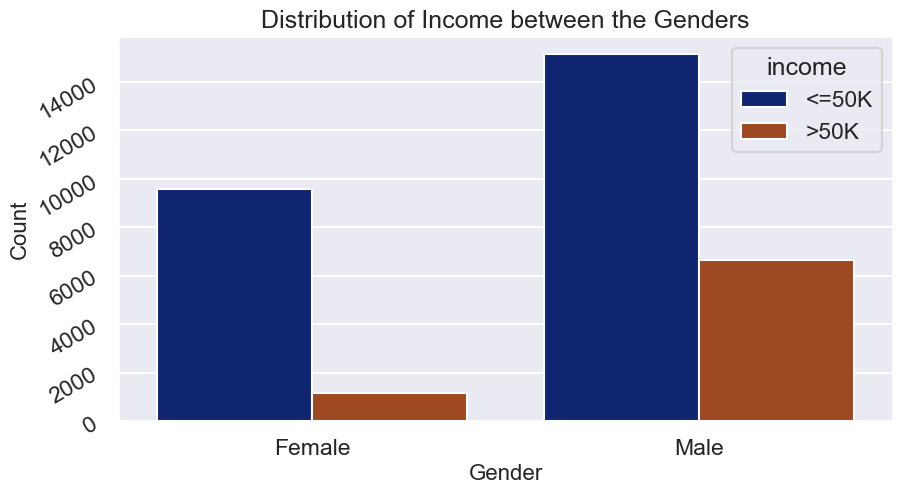

In [135]:
plt.figure(figsize=(10,5))
sns.countplot(data = adult, x='sex', hue=adult['income'])
plt.title('Distribution of Income between the Genders', fontsize=18)
sns.set_theme(context='talk',style="darkgrid", palette="dark")
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.yticks(rotation=30);

In [127]:
adult.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [128]:
adult.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

Since there are more male than female in this dataset, and the amount of those earning under 50K are generally higher;
To equalize one of the statistics we will be using, I decided to randomly pick the 7841 adults who earn under 50k then do an analysis 

In [129]:
under_50k = adult[adult['income'] == '<=50K'].index.to_list()

random_under_50k = random.sample(under_50k,7841)

income_under_50k = pd.DataFrame()

for index1 in random_under_50k:

    if (index1 not in random_under_50k):
        continue
    
    #Filter the data in adult for the available required index
    adult_filtered = adult.loc[[index1]]

    #Merge the filtered dataframe to our new dataframe on the index
    merged_data = pd.merge(adult_filtered, adult[adult.index == index1], left_index=True, right_index=True)

     #Append the merged data to the merged_df
    income_under_50k = pd.concat([income_under_50k,merged_data], ignore_index=True)

income_under_50k.drop(['age_y', 'workclass_y', 'fnlwgt_y',
       'education_y', 'education.num_y', 'marital.status_y', 'occupation_y',
       'relationship_y', 'race_y', 'sex_y', 'capital.gain_y', 'capital.loss_y',
       'hours.per.week_y', 'native.country_y', 'income_y'], axis=1, inplace=True)

income_under_50k

,age_x,workclass_x,fnlwgt_x,education_x,education.num_x,marital.status_x,occupation_x,relationship_x,race_x,sex_x,capital.gain_x,capital.loss_x,hours.per.week_x,native.country_x,income_x
0,32,Private,105938,HS-grad,9,Divorced,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,<=50K
1,22,Private,408383,Some-college,10,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K
2,27,Private,169958,5th-6th,3,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
3,29,Local-gov,183523,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,Iran,<=50K
4,36,Private,460437,9th,5,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7836,27,Private,310850,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,<=50K
7837,38,Private,203761,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Female,2354,0,40,United-States,<=50K
7838,40,Private,96055,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,45,United-States,<=50K
7839,37,Private,231491,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,<=50K


In [130]:
income_over_50k = pd.DataFrame()
over_50k_indexes =  adult[adult['income'] == '>50K'].index.to_list()

for index1 in over_50k_indexes:

    if (index1 not in over_50k_indexes):
        continue
    
    #Filter the data in adult for the available required index
    adult_filtered = adult.loc[[index1]]

    #Merge the filtered dataframe to our new dataframe on the index
    merged_data = pd.merge(adult_filtered, adult[adult.index == index1], left_index=True, right_index=True)

     #Append the merged data to the merged_df
    income_over_50k = pd.concat([income_over_50k,merged_data], ignore_index=True)

income_over_50k.drop(['age_y', 'workclass_y', 'fnlwgt_y',
       'education_y', 'education.num_y', 'marital.status_y', 'occupation_y',
       'relationship_y', 'race_y', 'sex_y', 'capital.gain_y', 'capital.loss_y',
       'hours.per.week_y', 'native.country_y', 'income_y'], axis=1, inplace=True)

income_over_50k

,age_x,workclass_x,fnlwgt_x,education_x,education.num_x,marital.status_x,occupation_x,relationship_x,race_x,sex_x,capital.gain_x,capital.loss_x,hours.per.week_x,native.country_x,income_x
0,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
1,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K
2,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
3,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
4,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7836,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
7837,71,Private,287372,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,10,United-States,>50K
7838,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
7839,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [131]:
pay_gap = pd.concat([income_over_50k,income_under_50k], ignore_index=True)
pay_gap.income_x.value_counts()


>50K     7841
<=50K    7841
Name: income_x, dtype: int64

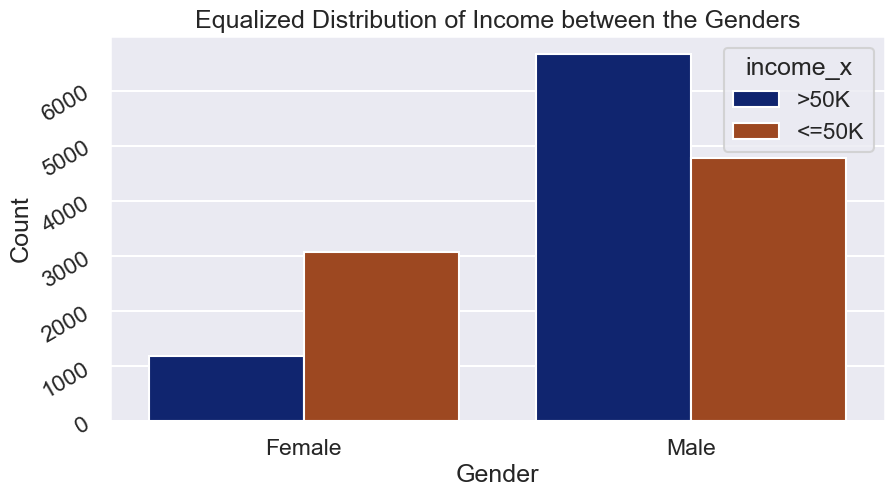

In [132]:
plt.figure(figsize=(10,5))

sns.countplot(data=pay_gap, x='sex_x', hue=pay_gap['income_x'])
plt.title('Equalized Distribution of Income between the Genders', fontsize=18)
sns.set_theme(context='talk',style="darkgrid", palette="dark")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.yticks(rotation=30);


Thus we can conculde that there is a general pay gap between the two genders for this specific case.
I randomized the result twice and the conclusion was generally similar, thus we can confirm the above conclusion in objectively true.

### QUESTION 3

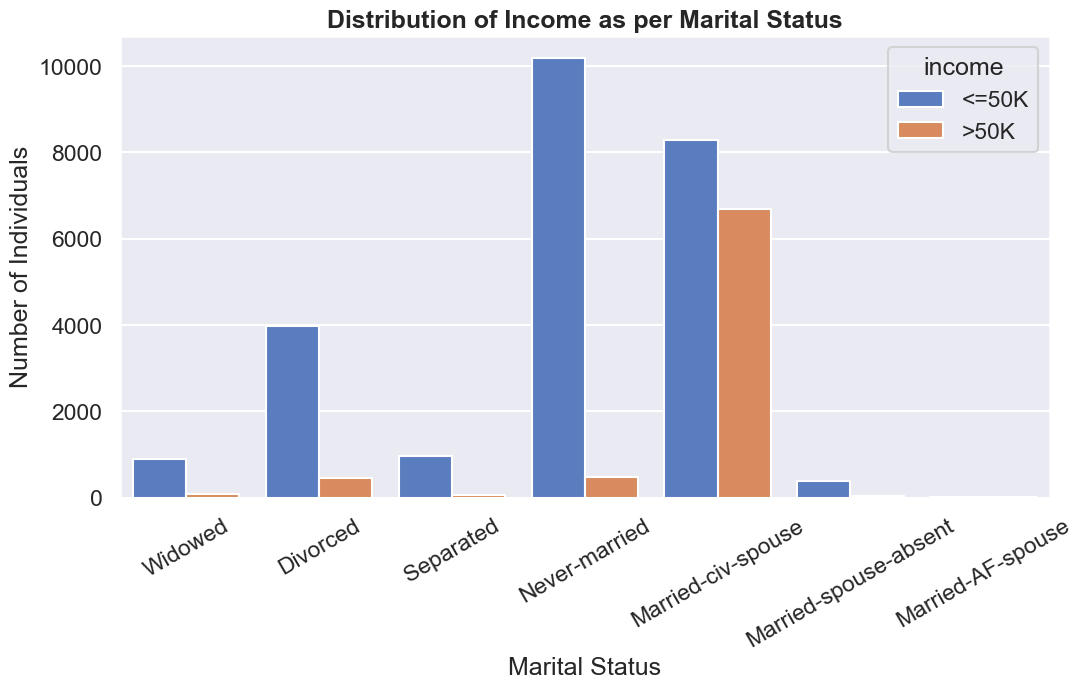

In [133]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(data=adult, x =adult['marital.status'], hue = adult['income'], palette='muted')
plt.title('Distribution of Income as per Marital Status', fontsize=18, fontweight='bold')
plt.xticks(rotation = 30)
plt.xlabel('Marital Status')
plt.ylabel('Number of Individuals');